In [1]:
from urllib.parse import urlencode
from urllib.request import urlopen
from datetime import datetime
import pandas as pd

from utils.LabelsDict import tickers
from utils.load_data import *
from typing import List, Optional

!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 123.1 kB/s eta 0:00:0000:0100:03
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "/home/maxim/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/home/maxim/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/home/maxim/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 112, in get_requires_for_build_wheel
          backend = _build_backend(

/home/maxim/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


2025-04-28 22:11:44,420:utils.portfolio:INFO: Stocks data was loaded from backup
2025-04-28 22:11:45,864:utils.portfolio:INFO: Multipliers data was loaded
2025-04-28 22:11:45,882:utils.portfolio:INFO: Portfolio was created
2025-04-28 22:11:45,944:utils.portfolio:INFO: The following column types were adjusted: 
['Долг, млрд руб', 'Капитализация, млрд руб', 'Чистый долг, млрд руб', 'high', 'low', 'close', 'EV/EBITDA', 'P/BV', 'P/E', 'P/S', 'open', 'Долг/EBITDA']
2025-04-28 22:11:46,608:utils.portfolio:INFO: Interest rate and inflation were added
2025-04-28 22:11:46,667:utils.portfolio:INFO: Missing values were filled in the following columns: ['debt', 'capitalization']
2025-04-28 22:11:56,948:utils.portfolio:INFO: Capital cost and capital volatility were successfully calculated
2025-04-28 22:11:56,957:utils.portfolio:INFO: Merton's probabilities of default were successfully calculated
2025-04-28 22:11:57,860:utils.portfolio:INFO: Plot was saved: logs/graphs/GAZP_pd.png


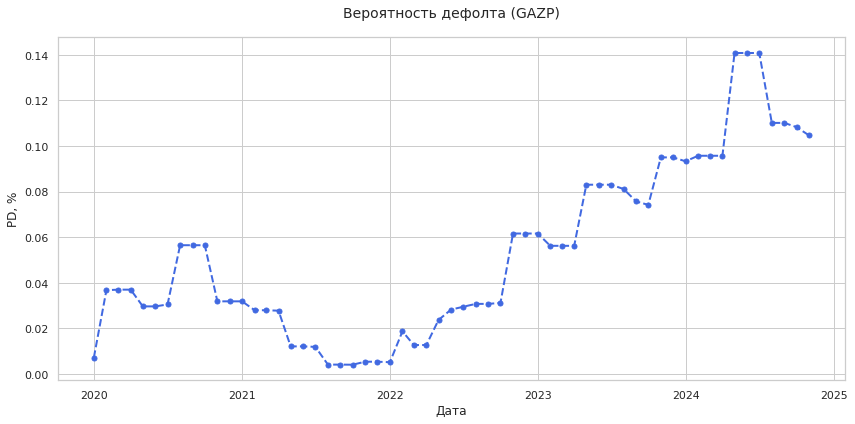

2025-04-28 22:11:58,986:utils.portfolio:INFO: Plot was saved: logs/graphs/LKOH_pd.png


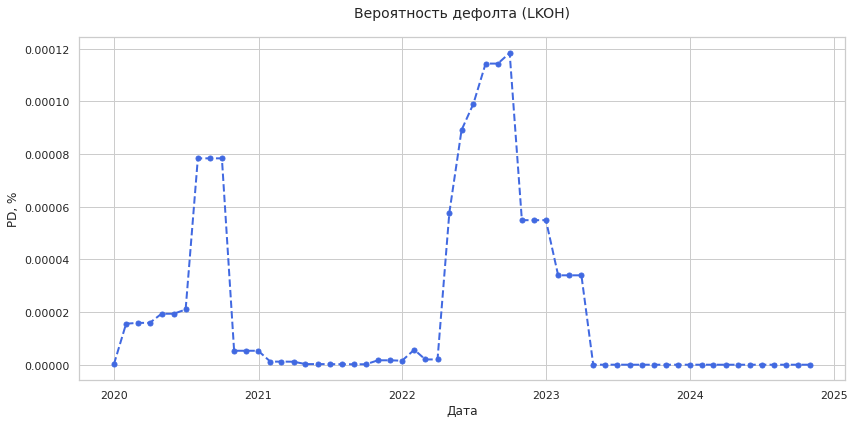

2025-04-28 22:12:00,192:utils.portfolio:INFO: Plot was saved: logs/graphs/ROSN_pd.png


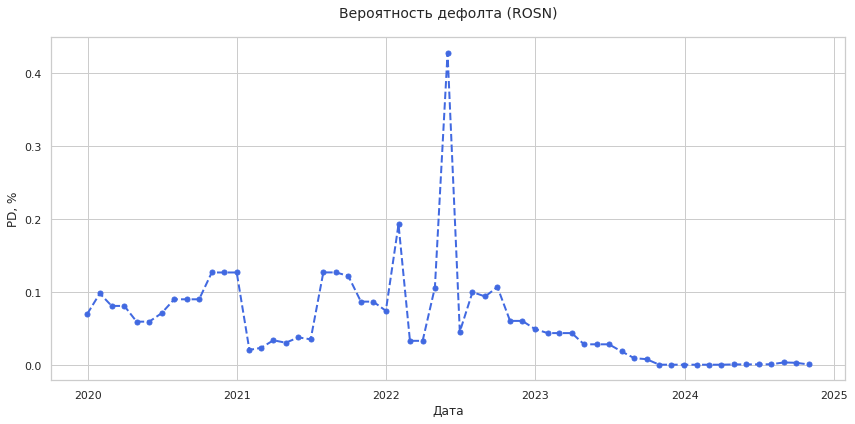

2025-04-28 22:12:01,257:utils.portfolio:INFO: Plot was saved: logs/graphs/SBER_pd.png


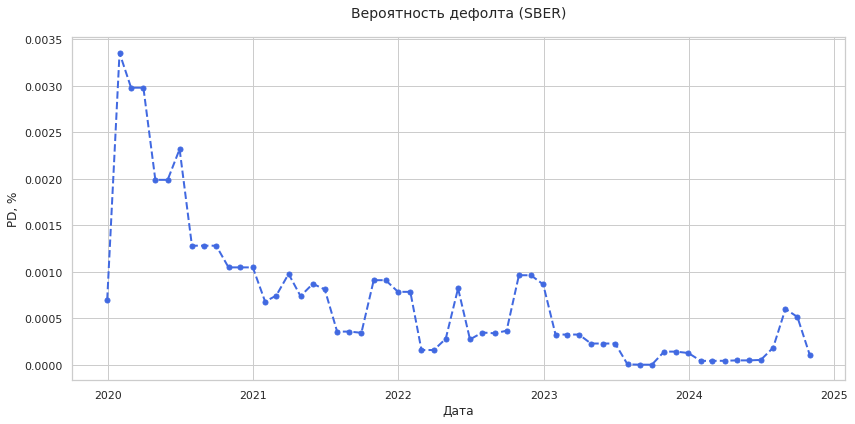

2025-04-28 22:12:02,341:utils.portfolio:INFO: Plot was saved: logs/graphs/VTBR_pd.png


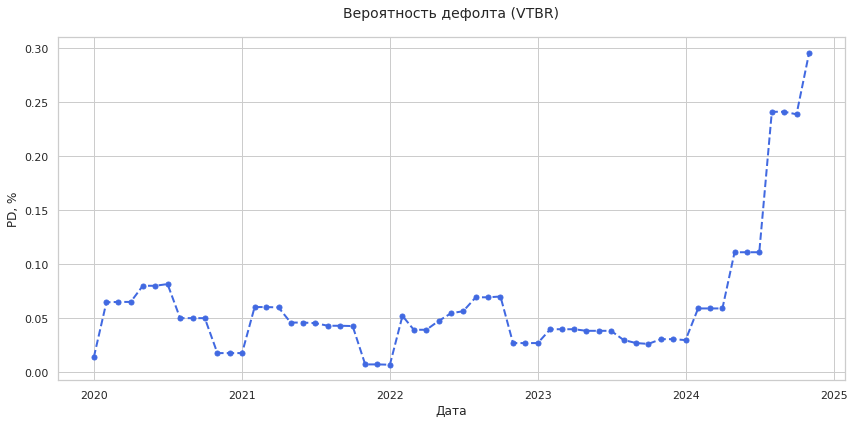

2025-04-28 22:12:03,485:utils.portfolio:INFO: Plot was saved: logs/graphs/MOEX_pd.png


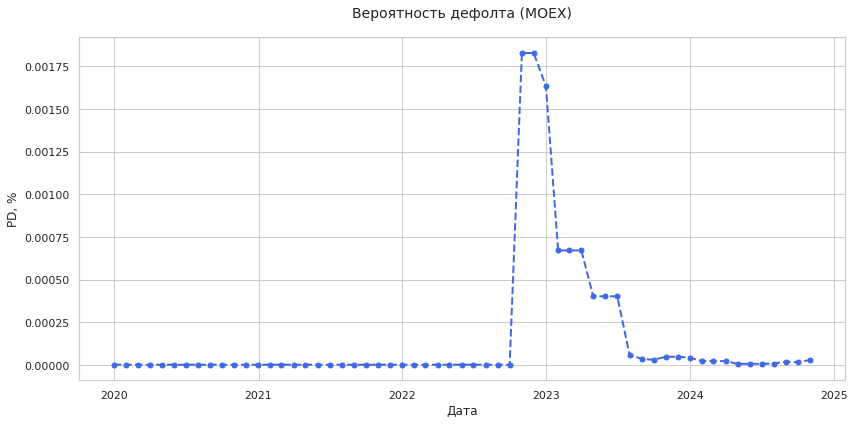

2025-04-28 22:12:04,829:utils.portfolio:INFO: Plot was saved: logs/graphs/GMKN_pd.png


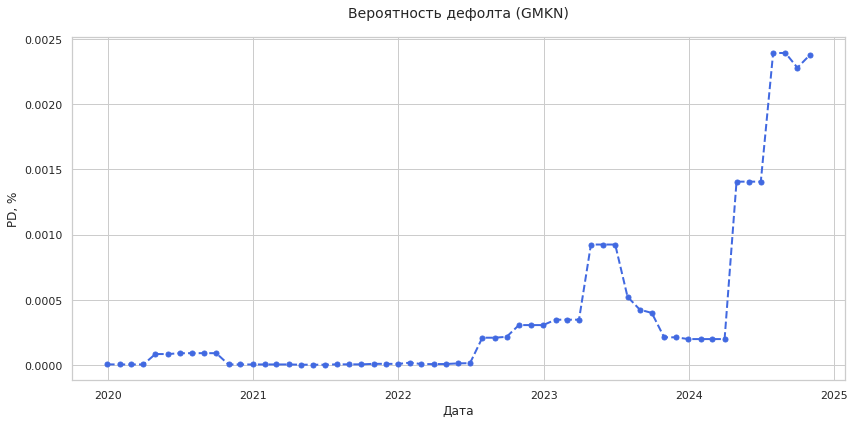

2025-04-28 22:12:06,034:utils.portfolio:INFO: Plot was saved: logs/graphs/NLMK_pd.png


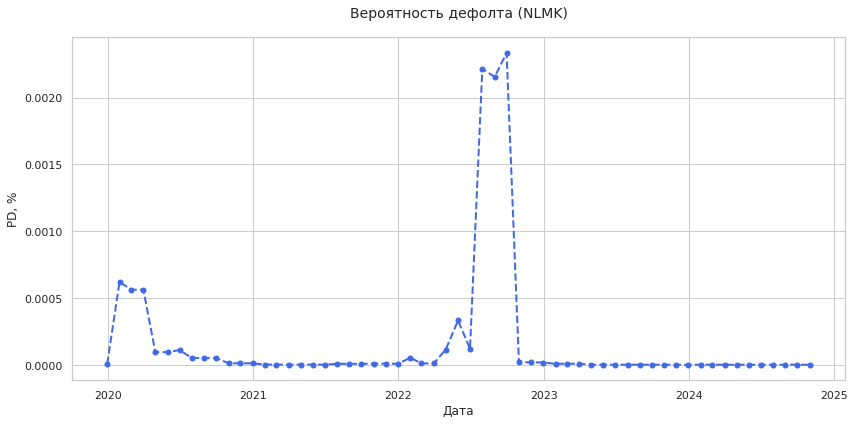

2025-04-28 22:12:07,197:utils.portfolio:INFO: Plot was saved: logs/graphs/RUAL_pd.png


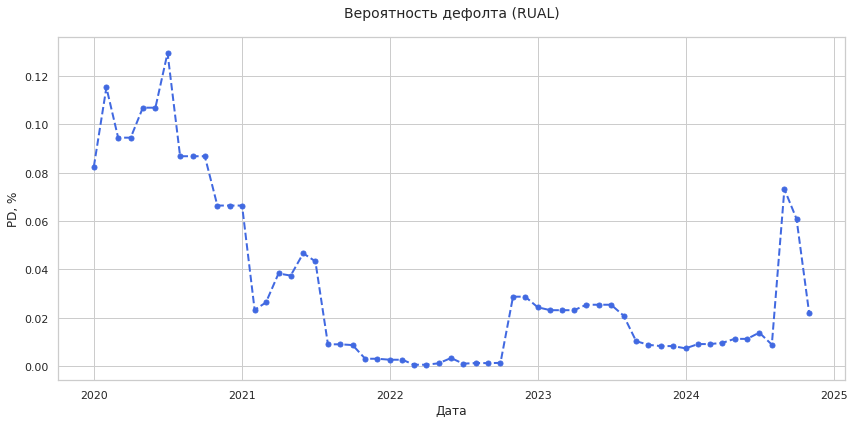

2025-04-28 22:12:08,287:utils.portfolio:INFO: Plot was saved: logs/graphs/MTSS_pd.png


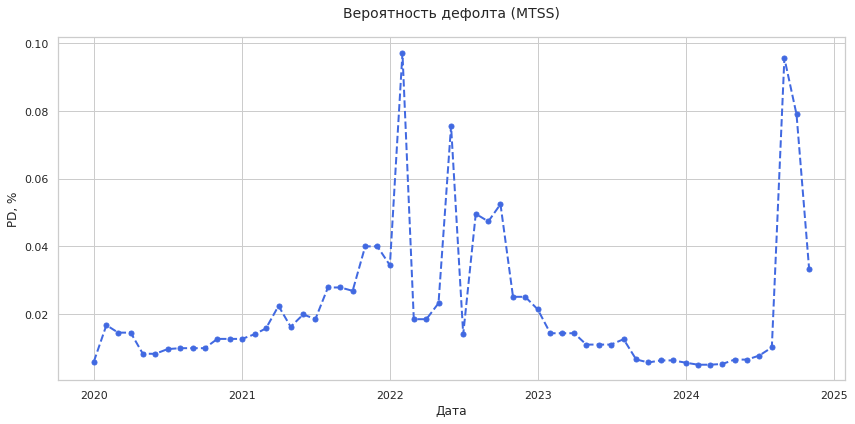

2025-04-28 22:12:09,550:utils.portfolio:INFO: Plot was saved: logs/graphs/RTKM_pd.png


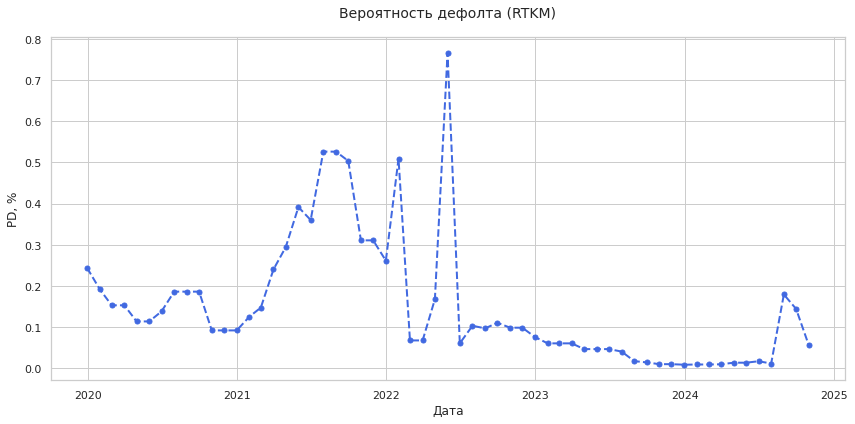

2025-04-28 22:12:10,872:utils.portfolio:INFO: Plot was saved: logs/graphs/TTLK_pd.png


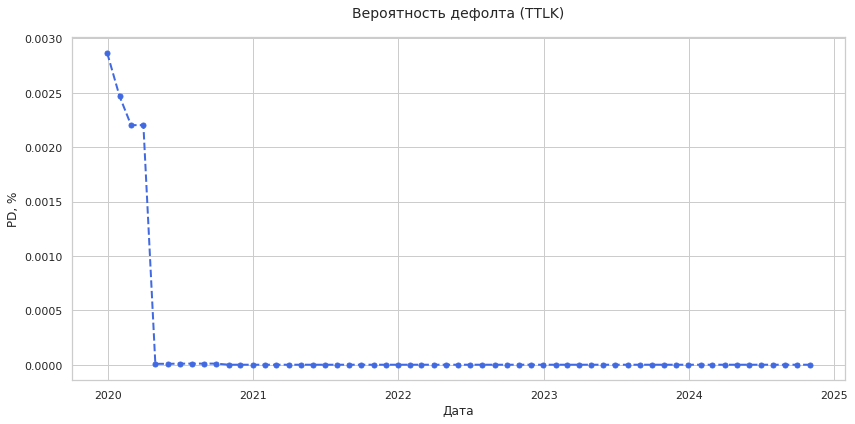

2025-04-28 22:12:12,080:utils.portfolio:INFO: Plot was saved: logs/graphs/MGNT_pd.png


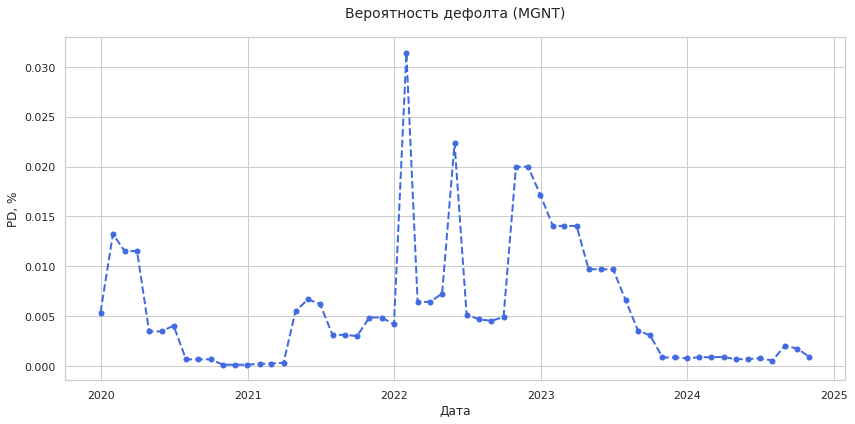

2025-04-28 22:12:13,527:utils.portfolio:INFO: Plot was saved: logs/graphs/LNTA_pd.png


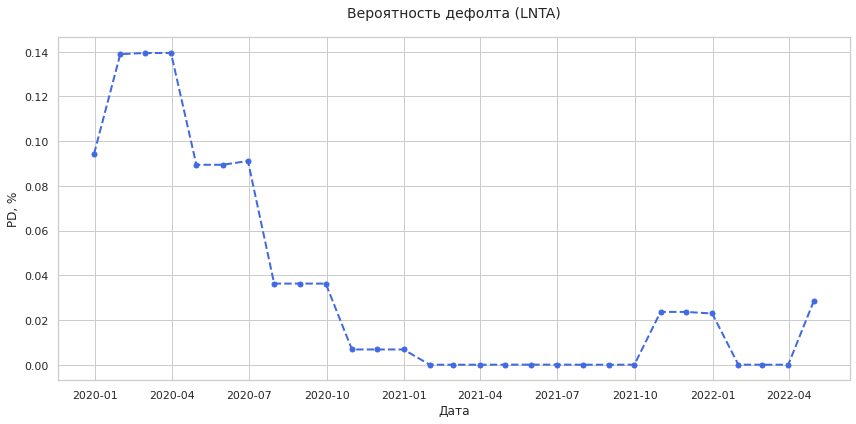

2025-04-28 22:12:14,930:utils.portfolio:INFO: Plot was saved: logs/graphs/FESH_pd.png


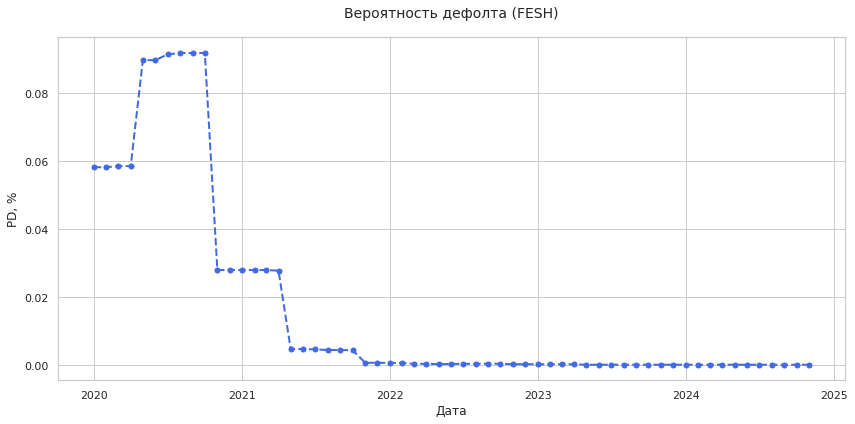

2025-04-28 22:12:17,598:utils.portfolio:INFO: Plot was saved: logs/graphs/GAZP_stock.png
2025-04-28 22:12:19,315:utils.portfolio:INFO: Plot was saved: logs/graphs/LKOH_stock.png
2025-04-28 22:12:21,021:utils.portfolio:INFO: Plot was saved: logs/graphs/ROSN_stock.png
2025-04-28 22:12:22,688:utils.portfolio:INFO: Plot was saved: logs/graphs/SBER_stock.png
2025-04-28 22:12:24,382:utils.portfolio:INFO: Plot was saved: logs/graphs/VTBR_stock.png
2025-04-28 22:12:26,180:utils.portfolio:INFO: Plot was saved: logs/graphs/MOEX_stock.png
2025-04-28 22:12:28,258:utils.portfolio:INFO: Plot was saved: logs/graphs/GMKN_stock.png
2025-04-28 22:12:30,616:utils.portfolio:INFO: Plot was saved: logs/graphs/NLMK_stock.png
2025-04-28 22:12:32,562:utils.portfolio:INFO: Plot was saved: logs/graphs/RUAL_stock.png
2025-04-28 22:12:34,422:utils.portfolio:INFO: Plot was saved: logs/graphs/MTSS_stock.png
2025-04-28 22:12:36,565:utils.portfolio:INFO: Plot was saved: logs/graphs/RTKM_stock.png
2025-04-28 22:12:38,6

<Figure size 864x432 with 0 Axes>

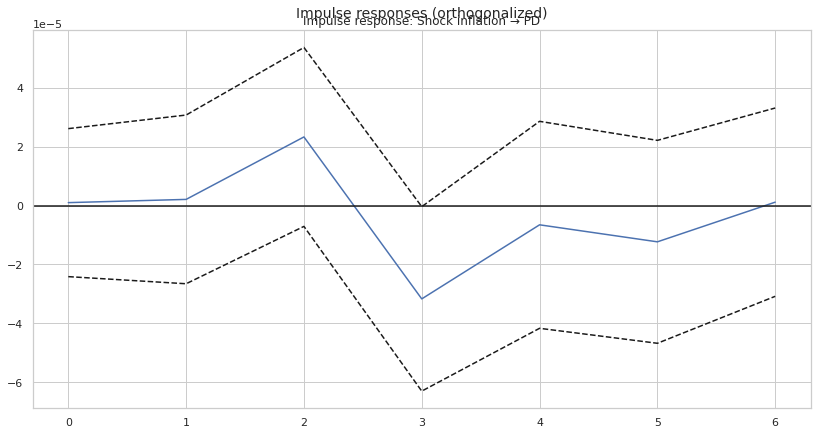

<Figure size 864x432 with 0 Axes>

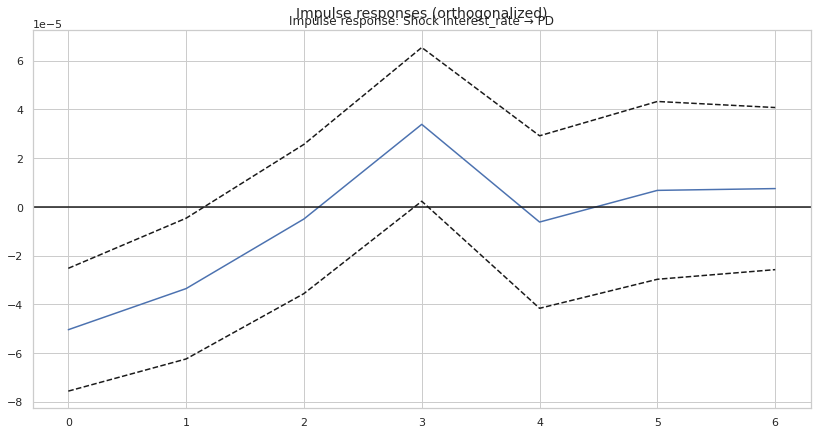

График сохранен: logs/graphs/corr_matrix.png


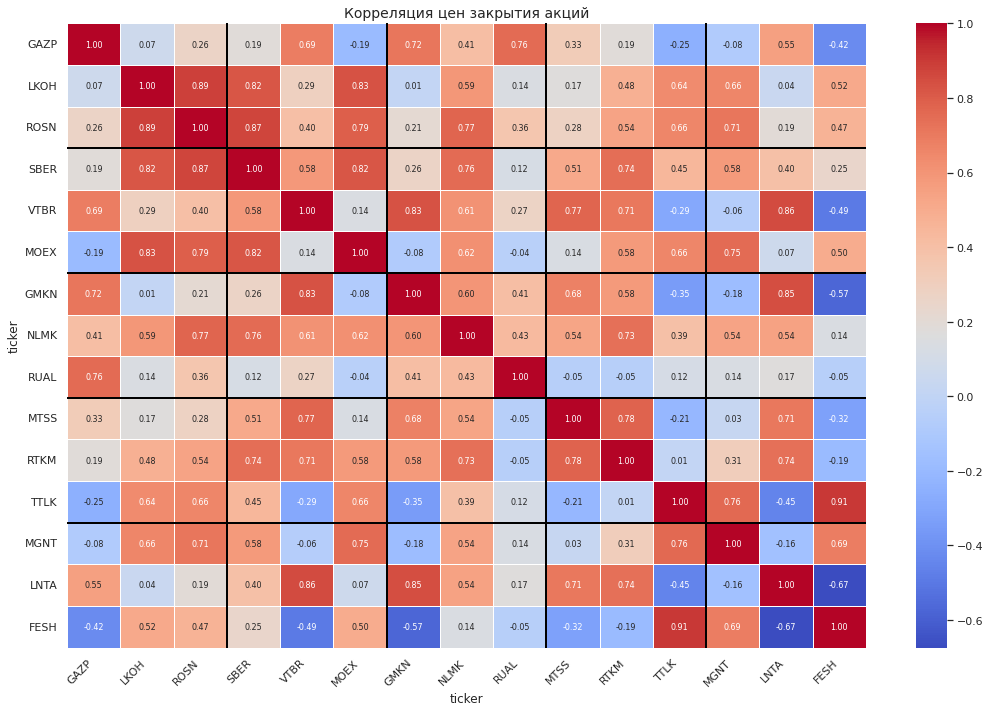

In [2]:
from utils.logger import Logger

log = Logger(__name__).get_logger()

from utils.portfolio import Portfolio

tickers_list= [
     # Нефтегазовая отрасль
    'GAZP', 'LKOH', 'ROSN',
    # Финансовый сектор (банки, биржи)
    'SBER', 'VTBR', 'MOEX',
    # Металлургия и горнодобывающая промышленность
    'GMKN', 'NLMK', 'RUAL',
    # Телекоммуникации
    'MTSS', 'RTKM', 'TTLK',
    # Розничная торговля/Потребительские товары
    'MGNT', 'LNTA', 'FESH',
]

calc = Portfolio(
    dt_calc='30.10.2024',
    dt_start='03.11.2019',
    stocks_step=10,
    tickers_list=tickers_list
)

calc = (
    calc
    .load_stock_data(           # загрузка рыночных данных цен закрытия компаний
        use_backup_data=True,   # загружать данные из backup копии
        create_backup=False     # обновить backup копию (в случае есть получены новые данные)
    )
    .load_multipliers()         # выделить мультипликаторы из МСФО
    .create_portfolio()         # создать портфель с загруженными данными
    .adjust_portfolio_data_types() # провести настройку форматов дат и типов данных
    .add_macro_data()              # загрузить макропараметры
    .fill_missing_values()         # обработать пропуски в данных
    .add_dynamic_features()        # проставить динамические признаки по дате, например, квартал
    .add_merton_pd()               # выполнить расчет вероятности дефолта по формуле Мертона
    .plot_pd_by_tickers(tickers=tickers_list, verbose=True)  # нарисовать PD
    .plot_stocks(tickers=tickers_list, verbose=False)        # нарисовать котировки акций
    # нарисовать динамику долга и стоимости активов
    .plot_combined_on_single_axis(save_path='logs/graphs/debt_catitalization') 
    # расчитать функции импульсного отклика
    .calc_irf(impulses_responses = {
        'inflation': 'PD', 'interest_rate': 'PD'
    })
    .plot_correlation_matrix(custom_order = [ # нарисовать матрицу корреляций
        'GAZP', 'LKOH', 'ROSN',# Нефтегазовая отрасль
        'SBER', 'VTBR', 'MOEX',# Финансовый сектор
        'GMKN', 'NLMK', 'RUAL',# Металлургия
        'MTSS', 'RTKM', 'TTLK',# Телекоммуникации
        'MGNT', 'LNTA', 'FESH' # Розничная торговля
    ])
)

In [3]:
calc.portfolio

,ticker,date,time,open,high,low,close,quarter,year,EV/EBITDA,...,P/E,P/FCF,P/S,debt,Долг/EBITDA,capitalization,interest_rate,inflation,quarterly_volatility,PD
796,FESH,2019-12-31,000000,7.70,9.700,7.500,8.81,4,2019,4.83,...,-11.70,NaN,0.46,3.290000e+10,2.65,2.600000e+10,0.0625,0.0300,0.049606,5.983878e-160
797,FESH,2020-01-31,000000,8.89,9.070,8.110,8.60,1,2020,NaN,...,NaN,NaN,NaN,3.290000e+10,NaN,2.600000e+10,0.0625,0.0240,0.049606,5.983878e-160
798,FESH,2020-02-29,000000,8.62,9.390,6.900,7.07,1,2020,NaN,...,NaN,NaN,NaN,3.290000e+10,NaN,2.600000e+10,0.0600,0.0230,0.049606,8.679944e-160
799,FESH,2020-03-31,000000,7.29,7.770,4.610,5.74,1,2020,NaN,...,NaN,NaN,NaN,3.290000e+10,NaN,2.600000e+10,0.0600,0.0250,0.049606,8.679944e-160
800,FESH,2020-04-30,000000,5.70,7.180,5.610,6.44,2,2020,4.80,...,4.99,25.2,0.38,3.320000e+10,2.81,2.140000e+10,0.0550,0.0310,0.145922,1.006606e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,VTBR,2024-06-30,000000,99.65,108.800,93.175,105.70,2,2024,NaN,...,1.36,NaN,NaN,1.101000e+12,NaN,5.664000e+11,0.1600,0.0859,0.930964,1.676034e-01
291,VTBR,2024-07-31,000000,105.85,106.975,91.650,97.82,3,2024,NaN,...,1.13,NaN,NaN,1.751000e+12,NaN,4.841000e+11,0.1800,0.0913,0.673374,6.468151e-02
292,VTBR,2024-08-31,000000,97.80,102.000,91.000,91.48,3,2024,NaN,...,1.13,NaN,NaN,1.751000e+12,NaN,4.841000e+11,0.1800,0.0905,0.415785,3.408889e-03
293,VTBR,2024-09-30,000000,90.95,94.600,83.810,89.03,3,2024,NaN,...,1.13,NaN,NaN,1.751000e+12,NaN,4.841000e+11,0.1900,0.0863,0.158196,1.981719e-13


In [5]:
def add_dynamic_features(df):
calc.portfolio['quarterly_volatility'] = calc.portfolio.groupby(['ticker', 'quarter'])['close'].transform(
    lambda x: np.std(np.log(x / x.shift(1))) * np.sqrt(252)
)

IndentationError: expected an indented block after function definition on line 1 (4019843435.py, line 2)

In [ ]:

import numpy as np
# Группировка данных по кварталам и расчет стандартного отклонения логарифмических доходностей
calc.portfolio['quarterly_volatility'] = calc.portfolio.groupby(['ticker', 'quarter'])['close'].transform(
    lambda x: np.std(np.log(x / x.shift(1))) * np.sqrt(252)
)


In [8]:
calc.portfolio

,ticker,date,time,open,high,low,close,quarter,year,EV/EBITDA,...,P/E,P/FCF,P/S,debt,Долг/EBITDA,capitalization,interest_rate,inflation,PD,quarterly_volatility
796,FESH,2019-12-31,000000,7.70,9.700,7.500,8.81,4,2019,4.83,...,-11.70,NaN,0.46,3.290000e+10,2.65,2.600000e+10,0.0625,0.0300,1.589796e-29,6.249631
797,FESH,2020-01-31,000000,8.89,9.070,8.110,8.60,1,2020,NaN,...,NaN,NaN,NaN,3.290000e+10,NaN,2.600000e+10,0.0625,0.0240,1.589796e-29,5.468982
798,FESH,2020-02-29,000000,8.62,9.390,6.900,7.07,1,2020,NaN,...,NaN,NaN,NaN,3.290000e+10,NaN,2.600000e+10,0.0600,0.0230,9.723459e-31,5.468982
799,FESH,2020-03-31,000000,7.29,7.770,4.610,5.74,1,2020,NaN,...,NaN,NaN,NaN,3.290000e+10,NaN,2.600000e+10,0.0600,0.0250,9.723459e-31,5.468982
800,FESH,2020-04-30,000000,5.70,7.180,5.610,6.44,2,2020,4.80,...,4.99,25.2,0.38,3.320000e+10,2.81,2.140000e+10,0.0550,0.0310,1.959840e-33,4.520524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,VTBR,2024-06-30,000000,99.65,108.800,93.175,105.70,2,2024,NaN,...,1.36,NaN,NaN,1.101000e+12,NaN,5.664000e+11,0.1600,0.0859,8.777149e-04,4.265833
291,VTBR,2024-07-31,000000,105.85,106.975,91.650,97.82,3,2024,NaN,...,1.13,NaN,NaN,1.751000e+12,NaN,4.841000e+11,0.1800,0.0913,9.980962e-01,5.380320
292,VTBR,2024-08-31,000000,97.80,102.000,91.000,91.48,3,2024,NaN,...,1.13,NaN,NaN,1.751000e+12,NaN,4.841000e+11,0.1800,0.0905,9.980962e-01,5.380320
293,VTBR,2024-09-30,000000,90.95,94.600,83.810,89.03,3,2024,NaN,...,1.13,NaN,NaN,1.751000e+12,NaN,4.841000e+11,0.1900,0.0863,9.996370e-01,5.380320


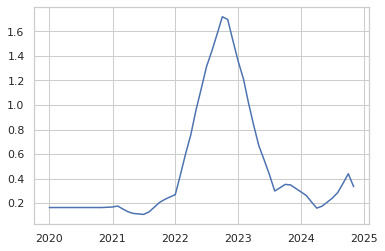

In [3]:
data = calc.portfolio.query('ticker == "GAZP"')
import matplotlib.pyplot as plt
plt.plot(data['date'], data['quarterly_volatility'])